In [1]:
import csv
import json
import pandas as pd 
import numpy as np
import string
import unidecode
import random
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk import word_tokenize
import matplotlib.pyplot as plt
import spacy
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, preprocessing, naive_bayes, svm
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, confusion_matrix
from sklearn import decomposition, ensemble
import xgboost
from sklearn.pipeline import Pipeline
from nltk.stem import LancasterStemmer, PorterStemmer

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from nltk.corpus import wordnet
import nltk
from collections import OrderedDict
from sklearn.model_selection import cross_validate, KFold, cross_val_predict
from keras.preprocessing import text, sequence
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
stoplist = stopwords.words('english')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shadow\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
with open("ChatbotCorpus.json", 'r', encoding='utf-8') as f:
    dataset = json.load(f)
    data = [[sample["text"], sample["intent"]] for sample in dataset["sentences"]]

In [4]:
def make_csv(filename, data):
    sentence = []
    intent = []
    for i in data:
        sentence.append(i[0])
        intent.append(i[1])

    data = {'sentence':sentence, 'intent':intent} 
    df = pd.DataFrame(data) 
    df.to_csv(filename, index=False)

In [5]:
make_csv('ChatbotCorpus.csv', data)

In [6]:
df = pd.read_csv('ChatbotCorpus.csv')

In [7]:
df.head(20)
df['sentence'][20]

'can you find a connection from quiddestraße to garching forschungszentrum?'

In [8]:
df['intent'].value_counts() 

FindConnection    128
DepartureTime      78
Name: intent, dtype: int64

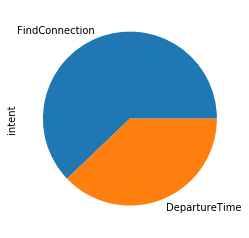

In [9]:
df['intent'].value_counts().plot(kind='pie')

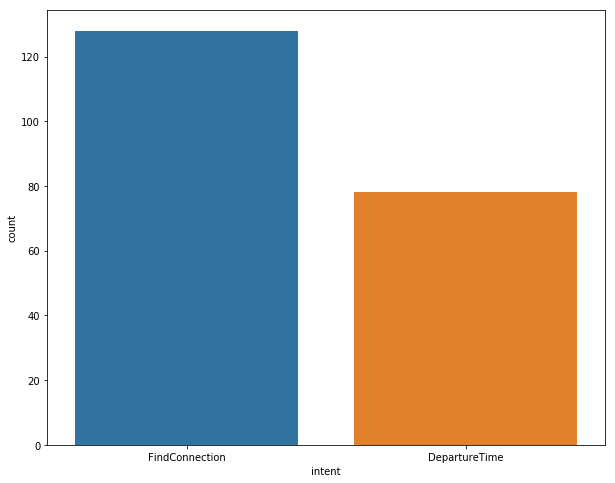

In [10]:
plt.figure(figsize = (10, 8))
sns.countplot(df['intent'])
plt.show()

In [11]:
lancaster=LancasterStemmer()

def cleaning(text):
    
    processed_text = re.sub(r'[^ a-z A-Z 0-9]', " ", unidecode.unidecode(text)).lower()

#Removing Stop words was not used as it's not appliciable in this problem statment
#     filtered_sentence = [w for w in tokens if not w in stop_words] 
#     filtered_sentence = [] 
  
#     for w in tokens: 
#         if w not in stop_words: 
#             filtered_sentence.append(w) 
    
#     print(tokens) 
#     print(filtered_sentence)
  
#Stemming the words Departs --> Depart
    token_words=word_tokenize(processed_text)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(lancaster.stem(word))
        stem_sentence.append(" ")
    
    #print(processed_text)
    #print("".join(stem_sentence))

    
    return "".join(stem_sentence)


In [12]:
df["sentence"] = df["sentence"].apply(cleaning)
df['sentence'][20]

'can you find a connect from quiddestrass to garch forschungszentr '

In [13]:
model_name = ['Naive Bayes', 'Logistic Regression', 'SGDClassifier','K-Nearest Neighbors', 'SVM', 'Random Forest Model', 'Xtereme Gradient Boosting Model', 'MultinomialNB','Extra Tress Classifier']
test_accuracy = []
precision = []
recall = []
f1_micro = []
auc = []

In [14]:
def append_to_dataframe(scores):
    test_accuracy.append(scores['test_accuracy'].mean())
    precision.append(scores['test_precision_macro'].mean())
    recall.append(scores['test_recall_macro'].mean())
    f1_micro.append(scores['test_f1_micro'].mean())
    auc.append(scores['test_roc_auc'].mean())


def train_model_feature_extraction(classifier, x,y):
    
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(analyzer='word')),
        ('clf', classifier)
    ])
    
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_micro', 'roc_auc']
    scores = cross_validate(pipeline, x, y, scoring=scoring, cv=10)
    append_to_dataframe(scores)
    
    return scores['test_accuracy'].mean()

def train_model(classifier, feature_vector_train, label, feature_vector_test):
    
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_micro','roc_auc']
    
    scores = cross_validate(classifier,feature_vector_train, label, scoring=scoring, cv=10)
    append_to_dataframe(scores)
    
    
#     classifier.fit(feature_vector_train, label)
    
#     predictions = classifier.predict(feature_vector_test)
#     test_accuracy.append(accuracy_score(y_test, predictions))
#     precision.append(precision_score(y_test, predictions, average='micro'))
#     recall.append(recall_score(y_test, predictions, average='micro'))
#     f1_micro.append(f1_score(y_test, predictions, average='micro'))

    return scores['test_accuracy'].mean()

# Feature engineering using TF-IDF Vectors as features

In [15]:
#X_train, X_test, y_train, y_test = train_test_split(df['sentence'].values, df['intent'].values, test_size=0.3, random_state=42)

In [16]:
# tfidf_vect = TfidfVectorizer(analyzer='word')
# tfidf_vect.fit(df['sentence'])

# xtrain_tfidf =  tfidf_vect.transform(X_train)
# xtest_tfidf =  tfidf_vect.transform(X_test)

X_tdidf = df['sentence'].values
y_tdidf = df['intent'].values

In [17]:
vectorizer = TfidfVectorizer()
analyze = vectorizer.build_analyzer()

temp = vectorizer.fit_transform(df['sentence'].values)

#print('Document 1',analyze(df['sentence'].values[0]))
#print('Document transform', (temp.toarray()[0]))

#The output signifies the important words which add context to all the sentences. These are the words that are important in the document
#print(vectorizer.get_feature_names())

## Machine Learning Models

### Naive Bayes

In [18]:
accuracy = train_model_feature_extraction(naive_bayes.MultinomialNB(), X_tdidf, y_tdidf)
print("Naive Bayes: ", accuracy)

Naive Bayes:  0.9408521303258146


### Logistic Regression

In [19]:
accuracy = train_model_feature_extraction(LogisticRegression(), X_tdidf, y_tdidf)
print("Logistic Regression: ", accuracy)

Logistic Regression:  0.9751879699248122


### SGDClassifier

In [20]:
accuracy = train_model_feature_extraction(SGDClassifier(alpha=.0001, max_iter=50, penalty="l1"), X_tdidf, y_tdidf)
print("SGDClassifier: ", accuracy)

SGDClassifier:  0.9704260651629072


### K-Nearest Neighbors

In [21]:
accuracy = train_model_feature_extraction(KNeighborsClassifier(n_neighbors=5), X_tdidf, y_tdidf)
print("KNN: ", accuracy)

KNN:  0.9609022556390977


### SVM

In [22]:
accuracy = train_model_feature_extraction(svm.SVC(kernel='linear'),X_tdidf, y_tdidf)
print("SVM, Vectors: ", accuracy)

SVM, Vectors:  0.9656641604010024


### Random Forest Model

In [23]:
accuracy = train_model_feature_extraction(ensemble.RandomForestClassifier(), X_tdidf, y_tdidf)
print("Random Forest: ", accuracy)

Random Forest:  0.9323308270676692


### Xtereme Gradient Boosting Model

In [24]:
accuracy = train_model_feature_extraction(xgboost.XGBClassifier(), X_tdidf, y_tdidf)
print("Xtereme Gradient Boosting Model: ", accuracy)

Xtereme Gradient Boosting Model:  0.9418546365914787


### MultinomialNB

In [25]:
accuracy = train_model_feature_extraction(MultinomialNB(alpha=.01), X_tdidf, y_tdidf)
print("MultinomialNB: ", accuracy)

MultinomialNB:  0.9313283208020049


### Extra Tress Classifier 

In [26]:
accuracy = train_model_feature_extraction(ExtraTreesClassifier(n_estimators=200), X_tdidf, y_tdidf)
print("Extra Tress Classifier: ", accuracy)

Extra Tress Classifier:  0.9609022556390977


In [27]:
models_initial = pd.DataFrame({
    'Model'       : model_name,
    'Accuracy'    : test_accuracy,
    'Precision'   : precision,
    'Recall'      : recall,
    'Micro-averaged F1 score' : f1_micro,
    'ROC AUC'     : auc
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'Micro-averaged F1 score', 'ROC AUC'])

models_initial.sort_values(by='Micro-averaged F1 score', ascending=False)

,Model,Accuracy,Precision,Recall,Micro-averaged F1 score,ROC AUC
1,Logistic Regression,0.975188,0.976190,0.975321,0.975188,0.994277
2,SGDClassifier,0.970426,0.972619,0.969071,0.970426,1.000000
4,SVM,0.965664,0.966190,0.967628,0.965664,0.999038
3,K-Nearest Neighbors,0.960902,0.956667,0.968590,0.960902,0.989240
8,Extra Tress Classifier,0.960902,0.961984,0.961378,0.960902,0.998077
6,Xtereme Gradient Boosting Model,0.941855,0.953616,0.941186,0.941855,0.996154
0,Naive Bayes,0.940852,0.941984,0.950160,0.940852,0.997619
5,Random Forest Model,0.932331,0.930871,0.938301,0.932331,0.987569
7,MultinomialNB,0.931328,0.938786,0.935256,0.931328,0.992811


# Training with pre-trained word vectors


In [28]:
df = pd.read_csv('ChatbotCorpus.csv')
sentence = np.array(df['sentence'].apply(cleaning))
intent = np.array(df['intent'])

In [29]:
sentence[:10]

array(['i want to go marienplatz ',
       'when is the next train in munch freiheit ',
       'when doe the next u bahn leav from garch forschungszentr ',
       'from olymp einkaufszentr to hauptbahnhof ',
       'when is the next train from winterstrass 12 to kieferngart ',
       'when is the next rocket from winterstrass 12 to kieferngart ',
       'can you find a connect from garch to hauptbahnhof ',
       'how to get from unt strassacker 21 to frottm ',
       'how i can get from marienplatz to garch ',
       'connect from boltzmannstrass to kieferngart '], dtype=object)

In [30]:
nlp = spacy.load('en_core_web_lg')

In [31]:
n_queries=len(sentence)
dim_embedding = nlp.vocab.vectors_length
X = np.zeros((n_queries, dim_embedding))

In [32]:
print(sentence)

['i want to go marienplatz ' 'when is the next train in munch freiheit '
 'when doe the next u bahn leav from garch forschungszentr '
 'from olymp einkaufszentr to hauptbahnhof '
 'when is the next train from winterstrass 12 to kieferngart '
 'when is the next rocket from winterstrass 12 to kieferngart '
 'can you find a connect from garch to hauptbahnhof '
 'how to get from unt strassacker 21 to frottm '
 'how i can get from marienplatz to garch '
 'connect from boltzmannstrass to kieferngart '
 'how to get from bon platz to freiman '
 'when is the next s bahn leav at garch ' 'how do i get from oez to hbf '
 'how to get from winterstrass 12 to frottm '
 'how do i get from garch forschungszentr to pas '
 'theresienstrass to assl '
 'how can i get from theresienstrass to munich east '
 'when doe the next bus start from garch ' 'from quiddestrass to garch '
 'can you find a connect from kurt eisn strasse to garch forschungszentr '
 'can you find a connect from quiddestrass to garch forsc

 'from garch to studentenstadt ']


In [33]:
for idx, sentence in enumerate(sentence):
    doc = nlp(sentence)
    X[idx, :] = doc.vector

In [34]:
X.shape

(206, 300)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, intent, test_size=0.3, random_state=42)

In [36]:
print("Train X: ", X_train.shape)
print("Train y: ", y_train.shape)
print("Test X: ", X_test.shape)
print("Tesr y: ", y_test.shape)

Train X:  (144, 300)
Train y:  (144,)
Test X:  (62, 300)
Tesr y:  (62,)


In [37]:
model_name = ['Logistic Regression', 'SGDClassifier','K-Nearest Neighbors', 'SVM', 'Random Forest Model', 'Xtereme Gradient Boosting Model','Extra Tress Classifier']
test_accuracy = []
precision = []
recall = []
f1_micro = []
auc = []

In [38]:
### Logistic Regression

accuracy = train_model(LogisticRegression(), X_train, y_train, X_test)
print("Logistic Regression: ", accuracy)

### SGDClassifier

accuracy = train_model(SGDClassifier(alpha=.0001, max_iter=50, penalty="l1"), X_train, y_train, X_test)
print("SGDClassifier: ", accuracy)

### K-Nearest Neighbors

accuracy = train_model(KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test)
print("KNN: ", accuracy)

### SVM

accuracy = train_model(svm.SVC(kernel='linear'), X_train, y_train, X_test)
print("SVM, Vectors: ", accuracy)

### Random Forest Model

accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
print("Random Forest: ", accuracy)

### Xtereme Gradient Boosting Model

accuracy = train_model(xgboost.XGBClassifier(), X_train, y_train, X_test)
print("Xtereme Gradient Boosting Model: ", accuracy)

### Extra Tress Classifier 

accuracy = train_model(ExtraTreesClassifier(n_estimators=200), X_train, y_train, X_test)
print("Extra Tress Classifier: ", accuracy)

Logistic Regression:  0.9564468864468866
SGDClassifier:  0.9641391941391942
KNN:  0.9503296703296703
SVM, Vectors:  0.970805860805861
Random Forest:  0.9343956043956043
Xtereme Gradient Boosting Model:  0.9420879120879121
Extra Tress Classifier:  0.970805860805861


In [39]:
models_initial = pd.DataFrame({
    'Model'       : model_name,
    'Accuracy'    : test_accuracy,
    'Precision'   : precision,
    'Recall'      : recall,
    'Micro-averaged F1 score' : f1_micro,
    'ROC AUC'     : auc
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'Micro-averaged F1 score', 'ROC AUC'])

models_initial.sort_values(by='Micro-averaged F1 score', ascending=False)

,Model,Accuracy,Precision,Recall,Micro-averaged F1 score,ROC AUC
3,SVM,0.970806,0.973333,0.969167,0.970806,0.997778
6,Extra Tress Classifier,0.970806,0.975714,0.969167,0.970806,1.000000
1,SGDClassifier,0.964139,0.968571,0.963611,0.964139,0.998148
0,Logistic Regression,0.956447,0.960238,0.957361,0.956447,0.998148
2,K-Nearest Neighbors,0.950330,0.959242,0.942500,0.950330,0.989815
5,Xtereme Gradient Boosting Model,0.942088,0.943571,0.941806,0.942088,0.993148
4,Random Forest Model,0.934396,0.937619,0.935556,0.934396,0.978750


In [40]:
sgd_classifier = SGDClassifier(alpha=.0001, max_iter=50, penalty="l1").fit(X_train, y_train)

def predictQuery(text):
    # Parse the text with spaCy.
    doc = nlp(text)
    for entity in doc.ents:
        print(f"{entity.text} ({entity.label_})")
    return sgd_classifier.predict(doc.vector.reshape(1,-1))

In [41]:
predictQuery("when the next train from borussia")

array(['DepartureTime'], dtype='<U14')

In [42]:
doc = nlp("can you find a connection from Munich to Garching - Forschungszentrum")
print(doc.ents)
for entity in doc.ents:
    print(f"{entity.text} ({entity.label_})")

(Munich, Garching - Forschungszentrum)
Munich (GPE)
Garching - Forschungszentrum (NORP)


# Data Augmentation

In [43]:
df['intent'].value_counts() 

FindConnection    128
DepartureTime      78
Name: intent, dtype: int64

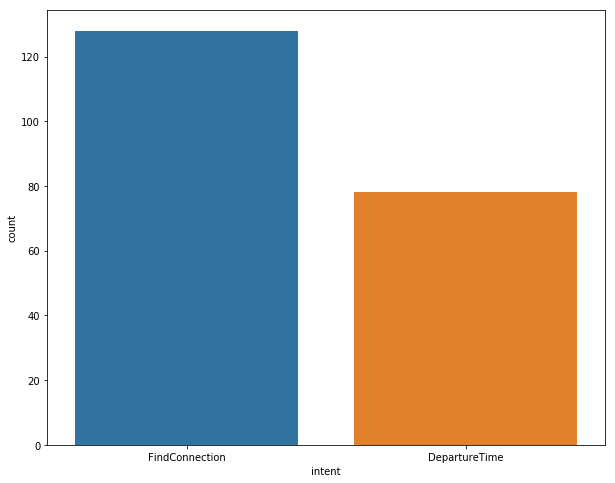

In [44]:
plt.figure(figsize = (10, 8))
sns.countplot(df['intent'])
plt.show()

In [45]:
# Selecting sentences with only DepartureTime as intent
sentence_departureTime = df[df['intent'] == 'DepartureTime']['sentence'].apply(cleaning)

In [46]:
sentence_departureTime.head(10)

1             when is the next train in munch freiheit 
2     when doe the next u bahn leav from garch forsc...
11               when is the next s bahn leav at garch 
17              when doe the next bus start from garch 
21               when doe the next train leav at garch 
26    when is the next train leav in garch forschung...
32                when doe the next bus start at garch 
34                when is the next bus from ostbahnhof 
36           when is the next train in munchn freiheit 
44                               next train from garch 
Name: sentence, dtype: object

In [47]:
def get_synonyms_lexicon(path):
    synonyms_lexicon = {}
    text_entries = [l.strip() for l in open(path, encoding='utf-8').readlines()]
    for e in text_entries:
        e = e.split(' ')
        k = e[0]
        v = e[1:len(e)]
        synonyms_lexicon[k] = v
    return synonyms_lexicon

def synonym_replacement(sentence, synonyms_lexicon):
    keys = synonyms_lexicon.keys()
    words = word_tokenize(sentence)
    n_sentence = sentence
    for w in words:
        if w not in stoplist:
            if w in keys:
                n_sentence = n_sentence.replace(w, synonyms_lexicon[w][0])  # we replace with the first synonym
    return n_sentence

def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [48]:
sentence_departureTime = sentence_departureTime.apply(lambda x: remove_punctuation(x)).values

In [49]:
new_sentences = []
for text in sentence_departureTime:
    sentences = text.split('.')
    synonyms_lexicon = get_synonyms_lexicon('data/ppdb-xl.txt')
    for sentence in sentences:
        new_sentence = synonym_replacement(sentence, synonyms_lexicon)
        print('%s' % sentence)
        print('%s' % new_sentence)
        print('\n')
        new_sentences.append(new_sentence)

when is the next train in munch freiheit 
when is the coming trains in monk freedom 


when doe the next u bahn leav from garch forschungszentr 
when doyudoyu the coming yu bahn leav from garch forschyungszentr 


when is the next s bahn leav at garch 
when is the coming s bahn leav at garch 


when doe the next bus start from garch 
when doudou the coming buses begin from garch 


when doe the next train leav at garch 
when doudou the coming trains leav at garch 


when is the next train leav in garch forschungszentr 
when is the coming trains leav in garch forschungszentr 


when doe the next bus start at garch 
when doudou the coming buses begin at garch 


when is the next bus from ostbahnhof 
when is the coming buses from ostbahnhof 


when is the next train in munchn freiheit 
when is the coming trains in munchn freedom 


next train from garch 
coming trains from garch 


when is the next subway from garch forschungszentr 
when is the coming metro from garch forschungszentr 


n

In [50]:
new_sentences[:10]

['when is the coming trains in monk freedom ',
 'when doyudoyu the coming yu bahn leav from garch forschyungszentr ',
 'when is the coming s bahn leav at garch ',
 'when doudou the coming buses begin from garch ',
 'when doudou the coming trains leav at garch ',
 'when is the coming trains leav in garch forschungszentr ',
 'when doudou the coming buses begin at garch ',
 'when is the coming buses from ostbahnhof ',
 'when is the coming trains in munchn freedom ',
 'coming trains from garch ']

In [51]:
sampling = random.choices(new_sentences, k=50)

In [52]:
len(sampling)

50

In [53]:
new_datafram = pd.DataFrame({'sentence': sampling,'intent': 'DepartureTime',}, columns = ['sentence', 'intent'])

In [54]:
frames = [df, new_datafram]
new_data = result = pd.concat(frames)
new_data = shuffle(new_data)

In [55]:
new_data.head(10)

,sentence,intent
121,can you find a bus from quiddestraße to lehel?,FindConnection
112,could you give me the fastest connection betwe...,FindConnection
43,i want to go to garching from marienplatz,FindConnection
203,when is the next bus in garching forschungszen...,DepartureTime
20,can you find a connection from quiddestraße to...,FindConnection
36,when is the next train in munchner freiheit?,DepartureTime
1,when doudou the coming s bahn leav from hauptb...,DepartureTime
155,when will the next u-bahn depart from garching...,DepartureTime
75,neufahrn to garching,FindConnection
187,how can i get to milbertshofen from garching?,FindConnection


In [56]:
df = new_data
df['intent'].value_counts() 

DepartureTime     128
FindConnection    128
Name: intent, dtype: int64

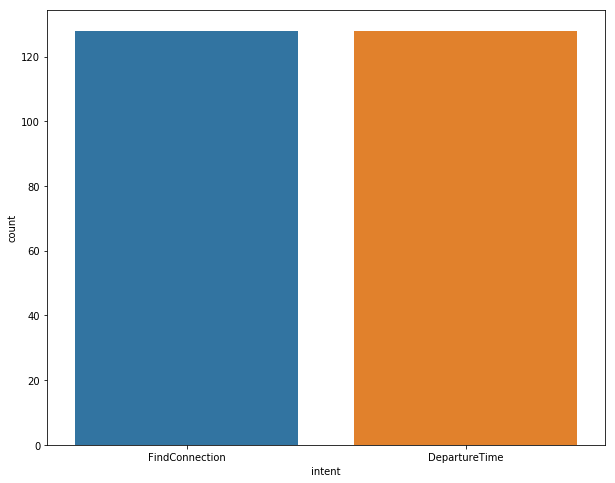

In [57]:
plt.figure(figsize = (10, 8))
sns.countplot(df['intent'])
plt.show()

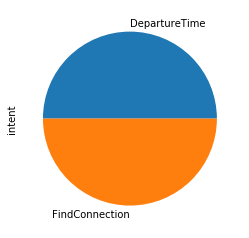

In [58]:
df['intent'].value_counts().plot(kind='pie')

In [59]:
sentence = np.array(df['sentence'])
intent = np.array(df['intent'])

In [60]:
n_queries=len(sentence)
dim_embedding = nlp.vocab.vectors_length
X = np.zeros((n_queries, dim_embedding))

In [61]:
for idx, sentence in enumerate(sentence):
    doc = nlp(sentence)
    X[idx, :] = doc.vector

In [62]:
X.shape

(256, 300)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, intent, test_size=0.3, random_state=42)

In [64]:
print("Train X: ", X_train.shape)
print("Train y: ", y_train.shape)
print("Test X: ", X_test.shape)
print("Tesr y: ", y_test.shape)

Train X:  (179, 300)
Train y:  (179,)
Test X:  (77, 300)
Tesr y:  (77,)


In [65]:
model_name = ['Logistic Regression', 'SGDClassifier','K-Nearest Neighbors', 'SVM', 'Random Forest Model', 'Xtereme Gradient Boosting Model','Extra Tress Classifier']
test_accuracy = []
precision = []
recall = []
f1_micro = []
auc = []

In [66]:
### Logistic Regression

accuracy = train_model(LogisticRegression(), X_train, y_train, X_test)
print("Logistic Regression: ", accuracy)

### SGDClassifier

accuracy = train_model(SGDClassifier(alpha=.0001, max_iter=50, penalty="l1"), X_train, y_train, X_test)
print("SGDClassifier: ", accuracy)

### K-Nearest Neighbors

accuracy = train_model(KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test)
print("KNN: ", accuracy)

### SVM

accuracy = train_model(svm.SVC(kernel='linear'), X_train, y_train, X_test)
print("SVM, Vectors: ", accuracy)

### Random Forest Model

accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
print("Random Forest: ", accuracy)

### Xtereme Gradient Boosting Model

accuracy = train_model(xgboost.XGBClassifier(), X_train, y_train, X_test)
print("Xtereme Gradient Boosting Model: ", accuracy)

### Extra Tress Classifier 

accuracy = train_model(ExtraTreesClassifier(n_estimators=200), X_train, y_train, X_test)
print("Extra Tress Classifier: ", accuracy)

Logistic Regression:  0.9671826625386997
SGDClassifier:  0.9835913312693499
KNN:  0.9882352941176471
SVM, Vectors:  0.9941176470588236
Random Forest:  0.9628654970760234
Xtereme Gradient Boosting Model:  0.9563639490884073
Extra Tress Classifier:  0.9780357757137942


In [67]:
models_initial = pd.DataFrame({
    'Model'       : model_name,
    'Accuracy'    : test_accuracy,
    'Precision'   : precision,
    'Recall'      : recall,
    'Micro-averaged F1 score' : f1_micro,
    'ROC AUC'     : auc
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'Micro-averaged F1 score', 'ROC AUC'])

models_initial.sort_values(by='Micro-averaged F1 score', ascending=False)

,Model,Accuracy,Precision,Recall,Micro-averaged F1 score,ROC AUC
3,SVM,0.994118,0.995000,0.993750,0.994118,0.997222
2,K-Nearest Neighbors,0.988235,0.989444,0.988194,0.988235,0.991667
1,SGDClassifier,0.983591,0.985909,0.983750,0.983591,0.997222
6,Extra Tress Classifier,0.978036,0.980354,0.978750,0.978036,0.998611
0,Logistic Regression,0.967183,0.969104,0.968194,0.967183,0.996111
4,Random Forest Model,0.962865,0.966263,0.965000,0.962865,0.992778
5,Xtereme Gradient Boosting Model,0.956364,0.957992,0.957639,0.956364,0.990278


In [68]:
sgd_classifier = SGDClassifier(alpha=.0001, max_iter=50, penalty="l1").fit(X_train, y_train)

In [69]:
def predictQuery(text):
    doc = nlp(text)
    return sgd_classifier.predict(doc.vector.reshape(1,-1))

In [70]:
predictQuery("When is the next train from Bayern to Franfurt")
predictQuery("what time is the next bus")

array(['DepartureTime'], dtype='<U14')

## Pointers

### Ask yourself why would they have selected this problem for the challenge? What are some basics in this domain I should know about?

#### Different approaches/algorithms to NLP. How different hyperparameters can be used to tweak the algorithm, sound understanding about preprocessing, and strong reason to pick one method over the other, knowledge with common libraries like nltk, spaCy

### What is the highest level of accuracy that others have achieved with this dataset or similar problems / datasets ?

#### <img src="chatapplication_results.jpg">

### What types of visualizations will help me grasp the nature of the problem data?

#### This is a classic binary intent classification problem. It's quite evident that there's a sentence and a corresponding intel class. We can check if it's balanced or imbalanced classification problem by plotting a bar graph or a pie chart to check the number of sentences for each class

### Which modeling techniques are good at capturing the types of relationships I see in this data?

#### I used a couple of techniques such as Logistic Regression, SGDClassifier, K-Nearest Neighbors,  SVM,  Random Forest Model, Xtereme Gradient Boosting Model, Extra Tress Classifier. Though I have also used deep learning, but deep learning works generally well when we have a relatively huge dataset. As the dataset contained only 200 datapoints, DL may overfit the given problem. 

### Now that I have a model, how can I be sure that I didn't introduce a bug in the code? If results are too good to be true, they probably are!

#### The bug can be detected by testing the model, code review, and taking advice from colleagues. If the results are too good to be true then we can thoroughly test the model with different inputs, and consider other performance metrics such as Confusion matrix Accuracy Precision Recall Specificity F1 score ROC

### What are some of the weaknesses of the model and how can the model be improved with additional work?

#### The model is as good as the dataset. The weakness in the model could be the imbalanced dataset. The model may not be robust as the dataset was smaller. Each algorithms comes with it's own weakness. The model can be improved by collecting more data, making model robust, hyperparamater tuning using GridSearch, using state-of-the art model like Semantic Hashsing for feature extraction or Flair and a lot more. 

### Can I leverage my experiments with weak results to improve overall model performance?

#### Yes, there should be good balanced between the accuracy and the live model. More accuracy doesn't mean the model will perform well on the test set. So we need to find the right/good balance without overfitting and underfitting the data.

### How do I measure performance? Does it help to have confidence values against the prediction?

#### Yes, It does to help to have cofidence values against the prediction. It shows how much certain the model is regarding a prediction. I've taken multiple factors while measuring the performances. 

### What are latency and compute needs for this model?
#### The compute for ML and DL models is really low. This is because of the low training dataset given. With only around 200 datapoints in the dataset, training the model was really fast and quick even while using deep neural networks.